## Load data

In [1]:
from dmml_project.dataset import Dataset
from dmml_project import PROJECT_ROOT
import matplotlib.pyplot as plt # type: ignore

dataset = Dataset.load(f'{PROJECT_ROOT}/data/dataset.tsv')

## Data exploration

### Class distribution

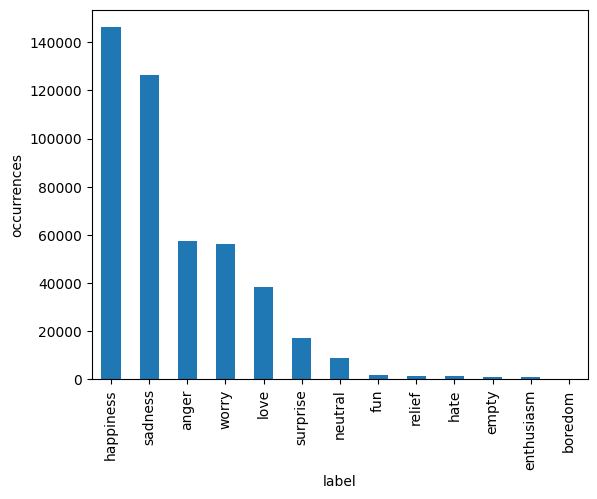

In [2]:
dataset.data['label'].value_counts().plot(kind='bar', xlabel='label', ylabel='occurrences')
plt.show()

### Length distribution

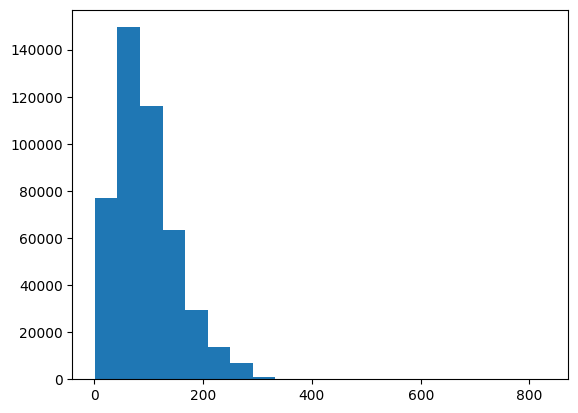

In [3]:
plt.hist([len(x) for x in dataset.data['text']], bins=20)
plt.show()

## Preprocessing

In [4]:
from dmml_project.preprocessor import Preprocessor
from dmml_project import PROJECT_ROOT

pp: Preprocessor = Preprocessor.load(f"{PROJECT_ROOT}/data/preprocessor/tfidf.pkl")

In [5]:
random_examples = dataset.data['text'].sample(5)
print("Before preprocessing:")
print(random_examples)
print("After preprocessing:")
print(pp(random_examples))

Before preprocessing:
159562    i wish i could make decisions easily and feel ...
388163                 i must be feeling dumb at the moment
251242    i have found that this also benefits me becaus...
441840    i feel jealous and envious when i see pictures...
404243    i have three key new insights that will set me...
Name: text, dtype: object
After preprocessing:
  (0, 3125)	0.3776795358724212
  (0, 3965)	0.33696193462566015
  (0, 12075)	0.2344767841525692
  (0, 13576)	0.3498040240548107
  (0, 16154)	0.3589280747672124
  (0, 18694)	0.05536851995014772
  (0, 32724)	0.20088418996126253
  (0, 42385)	0.40988350971464305
  (0, 54071)	0.15870519208940612
  (0, 59359)	0.3373277392711895
  (0, 60129)	0.2953663460808535
  (1, 15852)	0.6316923825777465
  (1, 18694)	0.10345826981576113
  (1, 35196)	0.5184859423246099
  (1, 36106)	0.5669510100632511
  (2, 2400)	0.18210783905436234
  (2, 4625)	0.17319117632788475
  (2, 5484)	0.2772719477540955
  (2, 5782)	0.29505390244424484
  (2, 7265)	0.235475